# Response criteria prediction for tumor with neural networks

Sam Tomioka<br>
2019-10-13

Same data used in [notebook3](03-tumor_prediction-sites-central.ipynb) will be used here. 

- Model based on `central`+`site` with 85% of data from each. Test on remaining `central` assessments, Test on remaining `site` assessments independently.

In [1]:
#!pip install git+git://github.com/andirs/impyte.git
#!pip install xgboost 

In [42]:

%load_ext autoreload
%autoreload 2

from lib.myutil import *
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.train import *
print('tensorflow version: {}'.format(tf.__version__))

import sklearn
from sklearn.metrics import accuracy_score,roc_curve, auc
print('sklearn version: {}'.format(sklearn.__version__))
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()

#tf.keras.backend.clear_session() 

tensorflow version: 1.14.0
sklearn version: 0.21.2


In [48]:
central, site=load_data()

tr_x, tr_y, ts_x, ts_y, ts_x2, ts_y2 = generate_tr_ts(df1=central, df2=site, m=3, method=None, h=3000, seed=2019)

In [49]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
tr_y = encoder.fit_transform(tr_y)
ts_y = encoder.fit_transform(ts_y)
ts_y2 = encoder.fit_transform(ts_y2)

In [4]:
tr_x.shape, tr_y.shape

((1373, 7), (1373, 5))

In [10]:
tf.keras.backend.clear_session() 
i = Input(shape=(7,),name='recest')
x = Dense(64, activation='relu', name='dense_1')(i)
x = Dense(32, activation='relu', name='dense_2')(x)
x = Dense(32, activation='relu', name='dense_3')(x)
x = Dense(16, activation='relu', name='dense_4')(x)
outputs = Dense(5, activation='softmax', name='pred')(x)

model = Model(i, outputs)
opt = AdamOptimizer(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
recest (InputLayer)          [(None, 7)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
pred (Dense)                 (None, 5)                 85        
Total params: 4,261
Trainable params: 4,261
Non-trainable params: 0
___________________________________________________________

In [11]:
x_train, x_vl, y_train, y_vl = train_test_split(tr_x, tr_y, test_size=0.20, random_state=2019)
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=200,

                    validation_data=(x_vl, y_vl))

Train on 1098 samples, validate on 275 samples
Epoch 1/200
1098/1098 [==============================] - 1s 1ms/sample - loss: 1.3109 - acc: 0.4964 - val_loss: 0.8948 - val_acc: 0.6291
Epoch 2/200
1098/1098 [==============================] - 0s 196us/sample - loss: 0.7377 - acc: 0.7286 - val_loss: 0.6615 - val_acc: 0.7600
Epoch 3/200
1098/1098 [==============================] - 0s 190us/sample - loss: 0.5926 - acc: 0.7750 - val_loss: 0.6464 - val_acc: 0.7127
Epoch 4/200
1098/1098 [==============================] - 0s 189us/sample - loss: 0.5471 - acc: 0.8005 - val_loss: 0.5470 - val_acc: 0.7855
Epoch 5/200
1098/1098 [==============================] - 0s 190us/sample - loss: 0.5000 - acc: 0.8197 - val_loss: 0.5009 - val_acc: 0.8000
Epoch 6/200
1098/1098 [==============================] - 0s 190us/sample - loss: 0.4631 - acc: 0.8379 - val_loss: 0.4405 - val_acc: 0.8291
Epoch 7/200
1098/1098 [==============================] - 0s 189us/sample - loss: 0.4339 - acc: 0.8497 - val_loss: 0.4289 

1098/1098 [==============================] - 0s 191us/sample - loss: 0.2104 - acc: 0.9162 - val_loss: 0.2080 - val_acc: 0.9164
Epoch 60/200
1098/1098 [==============================] - 0s 191us/sample - loss: 0.2128 - acc: 0.9199 - val_loss: 0.2293 - val_acc: 0.9236
Epoch 61/200
1098/1098 [==============================] - 0s 192us/sample - loss: 0.2117 - acc: 0.9153 - val_loss: 0.2148 - val_acc: 0.9200
Epoch 62/200
1098/1098 [==============================] - 0s 192us/sample - loss: 0.2111 - acc: 0.9180 - val_loss: 0.2194 - val_acc: 0.9200
Epoch 63/200
1098/1098 [==============================] - 0s 192us/sample - loss: 0.2012 - acc: 0.9253 - val_loss: 0.2313 - val_acc: 0.9055
Epoch 64/200
1098/1098 [==============================] - 0s 191us/sample - loss: 0.2092 - acc: 0.9126 - val_loss: 0.2015 - val_acc: 0.9309
Epoch 65/200
1098/1098 [==============================] - 0s 192us/sample - loss: 0.1956 - acc: 0.9189 - val_loss: 0.2360 - val_acc: 0.9127
Epoch 66/200
1098/1098 [=========

1098/1098 [==============================] - 0s 185us/sample - loss: 0.1740 - acc: 0.9290 - val_loss: 0.2214 - val_acc: 0.9018
Epoch 118/200
1098/1098 [==============================] - 0s 184us/sample - loss: 0.1777 - acc: 0.9299 - val_loss: 0.1927 - val_acc: 0.9236
Epoch 119/200
1098/1098 [==============================] - 0s 186us/sample - loss: 0.1700 - acc: 0.9353 - val_loss: 0.2039 - val_acc: 0.9127
Epoch 120/200
1098/1098 [==============================] - 0s 187us/sample - loss: 0.1764 - acc: 0.9299 - val_loss: 0.2157 - val_acc: 0.9200
Epoch 121/200
1098/1098 [==============================] - 0s 184us/sample - loss: 0.1678 - acc: 0.9372 - val_loss: 0.2142 - val_acc: 0.9200
Epoch 122/200
1098/1098 [==============================] - 0s 185us/sample - loss: 0.1683 - acc: 0.9362 - val_loss: 0.2052 - val_acc: 0.9127
Epoch 123/200
1098/1098 [==============================] - 0s 185us/sample - loss: 0.1952 - acc: 0.9199 - val_loss: 0.2754 - val_acc: 0.8945
Epoch 124/200
1098/1098 [==

1098/1098 [==============================] - 0s 187us/sample - loss: 0.1457 - acc: 0.9499 - val_loss: 0.2024 - val_acc: 0.9273
Epoch 176/200
1098/1098 [==============================] - 0s 190us/sample - loss: 0.1532 - acc: 0.9426 - val_loss: 0.2071 - val_acc: 0.9273
Epoch 177/200
1098/1098 [==============================] - 0s 187us/sample - loss: 0.1504 - acc: 0.9417 - val_loss: 0.2255 - val_acc: 0.9236
Epoch 178/200
1098/1098 [==============================] - 0s 188us/sample - loss: 0.1570 - acc: 0.9362 - val_loss: 0.1927 - val_acc: 0.9200
Epoch 179/200
1098/1098 [==============================] - 0s 188us/sample - loss: 0.1660 - acc: 0.9308 - val_loss: 0.2069 - val_acc: 0.9091
Epoch 180/200
1098/1098 [==============================] - 0s 199us/sample - loss: 0.1539 - acc: 0.9390 - val_loss: 0.2203 - val_acc: 0.9091
Epoch 181/200
1098/1098 [==============================] - 0s 187us/sample - loss: 0.1568 - acc: 0.9444 - val_loss: 0.2194 - val_acc: 0.9164
Epoch 182/200
1098/1098 [==

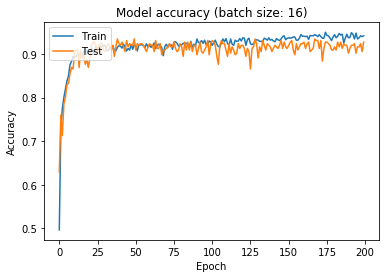

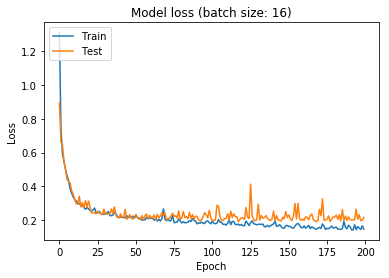

In [12]:
plot_hist(history)

In [13]:
results1=model.evaluate(ts_x, ts_y, batch_size=32)
print('\nm=3, test=C\n test loss: {}\n  test acc: {}'.format(results1[0],results1[1]))

138/138 [==============================] - 0s 2ms/sample - loss: 0.4891 - acc: 0.8623

m=3, test=C
 test loss: 0.48913060436430184
  test acc: 0.8623188138008118


In [14]:
results2=model.evaluate(ts_x2, ts_y2, batch_size=32)
print('\nm=3, test=D\n test loss: {}\n  test acc: {}'.format(results2[0],results2[1]))

104/104 [==============================] - 0s 1ms/sample - loss: 0.2849 - acc: 0.9712

m=3, test=D
 test loss: 0.28494367461938125
  test acc: 0.9711538553237915


## check where model did not predict correctly

In [59]:
_, _, ts_x_df, ts_y_lbl, ts_x2_df, ts_y2_lbl = generate_tr_ts(df1=central, df2=site, m=3, method=None, h=3000, seed=2019, normalize=False)

In [62]:
def prediction(encoder, model, test_x):
    pred=model.predict(test_x)
    return encoder.inverse_transform(np.round(pred))
def return_predict(encoder, model, test_x, test_y):
    pred=prediction(encoder, model, test_x)
    results=[pred==true for pred, true in list(zip(pred,test_y))]
    return results

In [80]:
ts_x_df['Label']=ts_y_lbl['TRGRESP']
ts_x_df['Pred']=prediction(encoder, model, ts_x)
ts_x_df['Correct']=return_predict(encoder, model, ts_x, ts_y_lbl['TRGRESP'])
ts_x_df

,BSUM,SUMDIAM,PCBSD,NADIR,ACNSD,PCNSD,NEWLSN,Label,Pred,Correct
411,194,216.0,11.340206,194,22.0,11,1,SD,SD,True
13,30,20.0,-33.333333,10,10.0,100,0,PD,PD,True
194,154,66.0,-57.142857,154,-88.0,-57,0,PR,PR,True
336,176,168.0,-4.545455,176,-8.0,-5,1,SD,SD,True
710,111,28.0,-74.774775,26,2.0,8,0,CR,PR,False
648,16,5.0,-68.750000,5,0.0,0,0,CR,CR,True
863,53,29.0,-45.283019,42,-13.0,-31,0,PR,PR,True
873,16,13.0,-18.750000,13,0.0,0,0,SD,SD,True
30,167,7.0,-95.808383,5,2.0,40,0,CR,PD,False
3,67,26.0,-61.194030,29,-3.0,-10,0,CR,PR,False


In [82]:
ts_x2_df['Label']=ts_y2_lbl['TRGRESP']
ts_x2_df['Pred']=prediction(encoder, model, ts_x2)
ts_x2_df['Correct']=return_predict(encoder, model, ts_x2, ts_y2_lbl['TRGRESP'])
ts_x2_df

,BSUM,SUMDIAM,PCBSD,NADIR,ACNSD,PCNSD,NEWLSN,Label,Pred,Correct
194,37.0,20.0,-45.945946,23.0,-3.0,-13,0,PR,PR,True
336,33.0,41.0,24.242424,33.0,8.0,24,0,PD,PD,True
654,31.0,24.0,-22.580645,24.0,0.0,0,0,SD,SD,True
662,63.9,78.9,23.474178,63.9,15.0,23,0,PD,PD,True
30,195.0,194.0,-0.512821,161.0,33.0,20,0,PD,PD,True
3,37.0,0.0,-100.000000,5.0,-5.0,-100,0,CR,CR,True
356,31.0,19.0,-38.709677,31.0,-12.0,-39,0,PR,PR,True
632,74.0,44.0,-40.540541,55.0,-11.0,-20,0,PR,PR,True
407,28.0,26.0,-7.142857,13.0,13.0,100,0,PD,PD,True
476,17.0,16.0,-5.882353,17.0,-1.0,-6,0,SD,SD,True
